## HW9 Digit Classification with KNN and Final Project Updates


In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. 

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

from scipy.io import arff

# Load ARFF file
mnist, meta = arff.loadarff('mnist_784.arff')

# # Convert data to DataFrame (optional)
# import pandas as pd
# df = pd.DataFrame(data)


from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True)

X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
X = X.to_numpy()
Y = Y.to_numpy()

shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape:', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]


/Users/jiyonglee/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


data shape: (70000, 784)
label shape: (70000,)


In [3]:
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

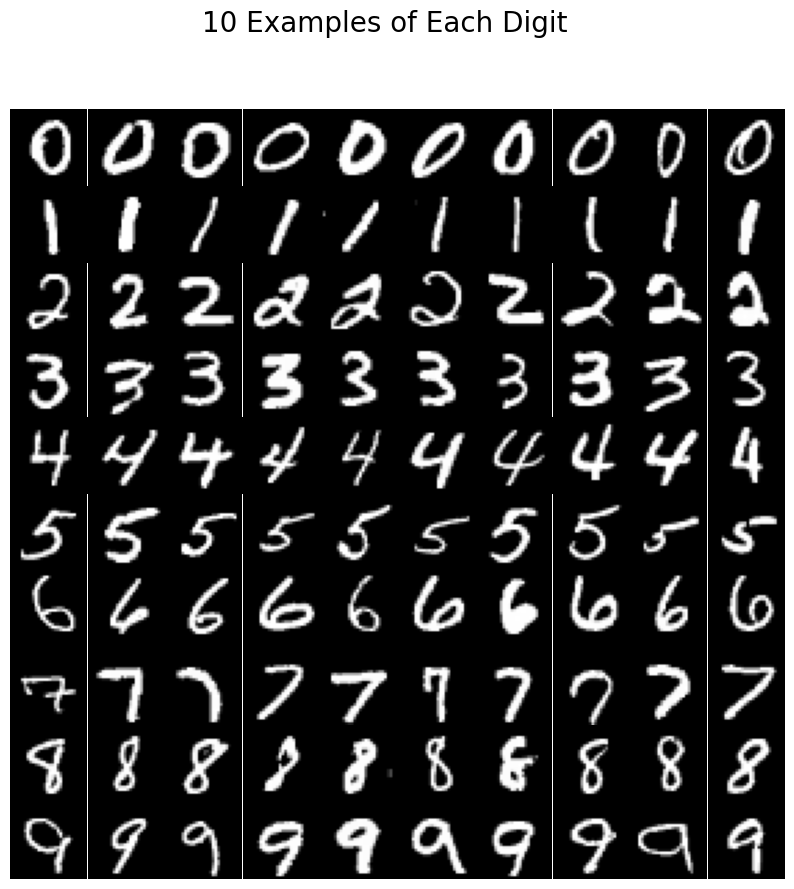

In [9]:
#Your code here:

import matplotlib.pyplot as plt
import numpy as np

# Set the color 
plt.rc('image', cmap='gray')

# Number of examples per digit
num_examples = 10

# Create a figure with subplots in a 10x10 grid
fig, axes = plt.subplots(nrows=10, ncols=num_examples, figsize=(10,10))

# Set the title
fig.suptitle('10 Examples of Each Digit', fontsize=20)

# Remove space between subplots
plt.subplots_adjust(wspace=0, hspace=0)

for digit in range(10):
    # Find indices of all occurrences of the digit
    indices = np.where(Y == str(digit))[0][:num_examples]
    for i, idx in enumerate(indices):
        ax = axes[digit, i]
        ax.imshow(X[idx].reshape(28, 28))
        ax.axis('off') 

# Show the plot
plt.show()

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [10]:
#your code here:
k = [1,3,5,7,9]
for each in k:
    knn = KNeighborsClassifier(n_neighbors=each)
    knn.fit(mini_train_data, mini_train_labels)
    dev_predicted_labels = knn.predict(dev_data)
    classification_report(dev_labels, dev_predicted_labels)

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(mini_train_data, mini_train_labels)
dev_predicted_labels = knn.predict(dev_data)
print(classification_report(dev_labels, dev_predicted_labels))
print("8 has the lowest f1-score, meaning it is the most difficult digit.")

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

8 has the lowest f1-score, meaning it is the most difficult digit.


(3) Project updates! Prepare a ppt deck for class! 